In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('../input/hr-analytics/HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#Now the first marking will be: What is/are the main factor/factors behind the employee retention / holding on the jobs?
#Here the column value left ==1 means employee leaving the job and left==0 means employee holding the job

In [3]:
retention=data[data['left']==1]
retention.shape

(3571, 10)

In [4]:
retention.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
holding=data[data['left']==0]
holding.shape

(11428, 10)

In [6]:
holding.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [7]:
data.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


**Reasons behind the employee retentions are:**
1.Satisfaction Level
2.Average Monthly Hours
3.Promotion Last 5 Years

**Relation between Satisfaction level and Department**

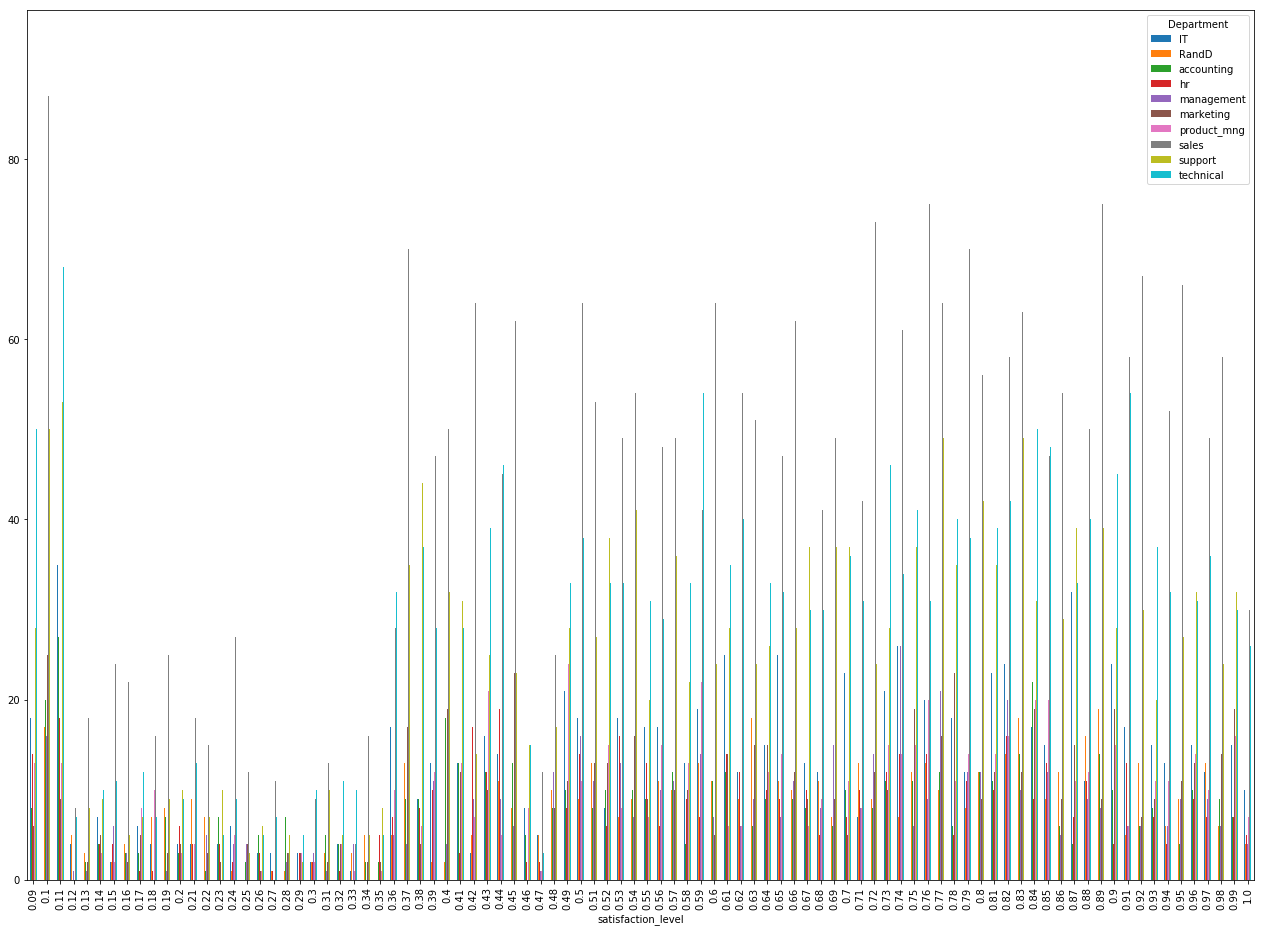

In [8]:
pd.crosstab(data.satisfaction_level,data.Department).plot(kind='bar',figsize=(22, 16))

In [9]:
max_satisfaction=data['satisfaction_level'].max()
max_satisfaction

1.0

In [10]:
a=data.loc[data['satisfaction_level']==1.0,'Department'].unique()
a

array(['technical', 'support', 'sales', 'marketing', 'hr', 'accounting',
       'management', 'product_mng', 'IT', 'RandD'], dtype=object)

In [11]:
data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [12]:
data.Department.nunique()

10

In [13]:
min_satisfaction=data['satisfaction_level'].min()

In [14]:
min_satisfaction

0.09

In [15]:
a=data.loc[data['satisfaction_level']==0.09,'Department'].unique()
a

array(['sales', 'accounting', 'technical', 'product_mng', 'hr', 'support',
       'IT', 'RandD', 'marketing', 'management'], dtype=object)

In [16]:
a=data.loc[data['satisfaction_level']==0.09,'Department'].nunique()
a

10

**Relation Between Highest Satisfaction level and Salary**

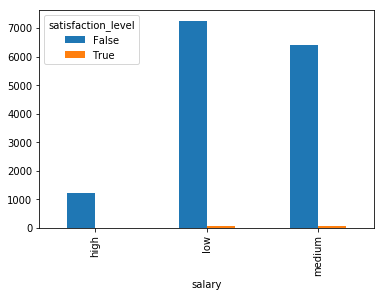

In [17]:
pd.crosstab(data.salary,data['satisfaction_level']==1.0).plot(kind='bar')

**Relation between Job left and satisfaction **

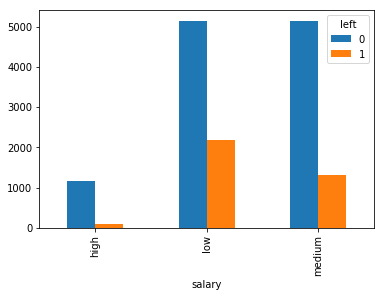

In [18]:
pd.crosstab(data.salary,data.left).plot(kind='bar')

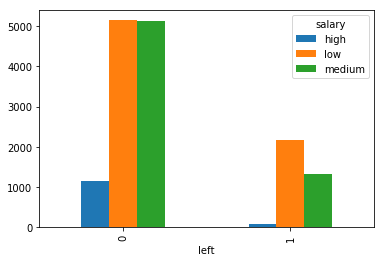

In [19]:
pd.crosstab(data.left,data.salary).plot(kind='bar')

**From the above two charts we can define that : Employees having high salary are likely not to leave the company **

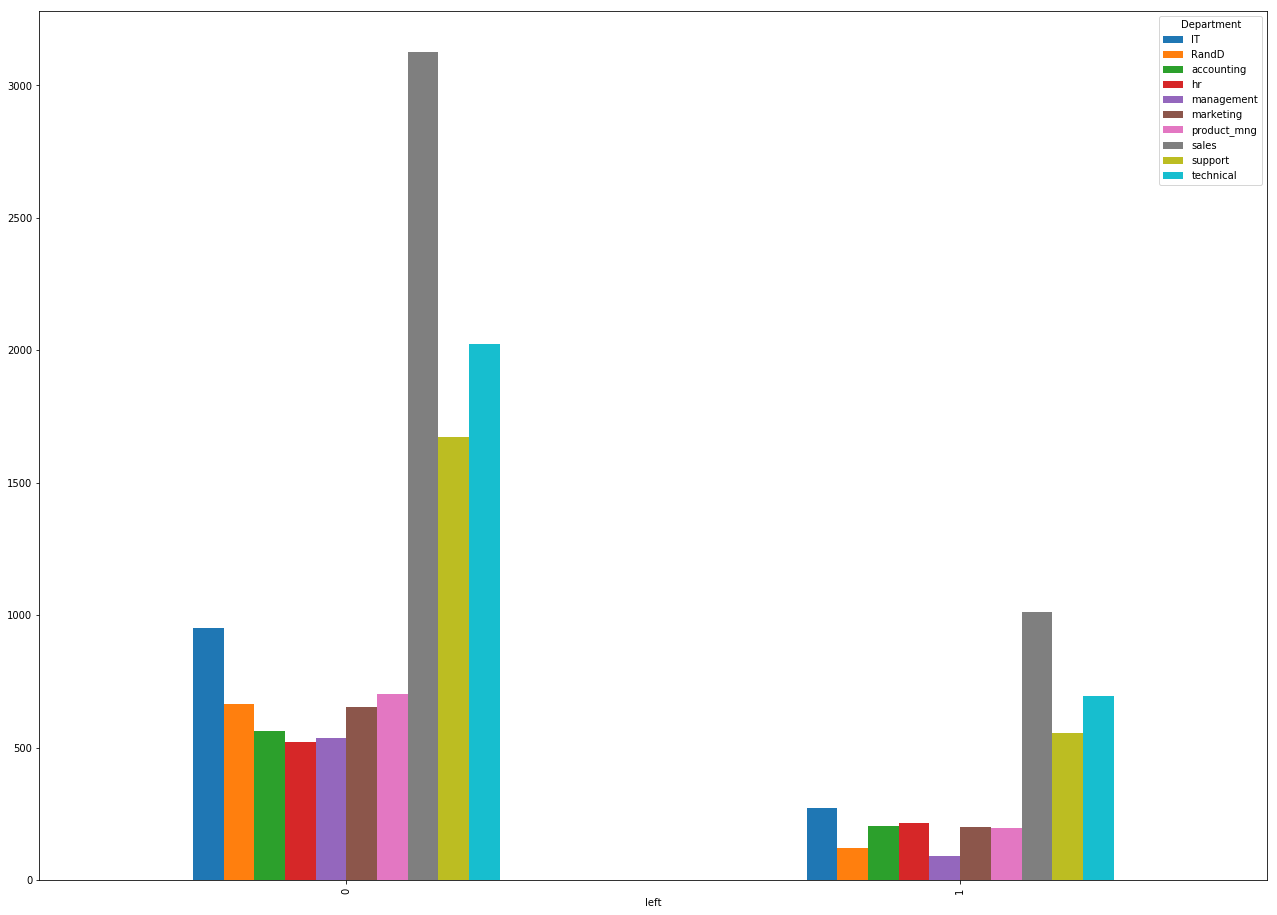

In [20]:
pd.crosstab(data.left,data.Department).plot(kind='bar', figsize=(22,16))

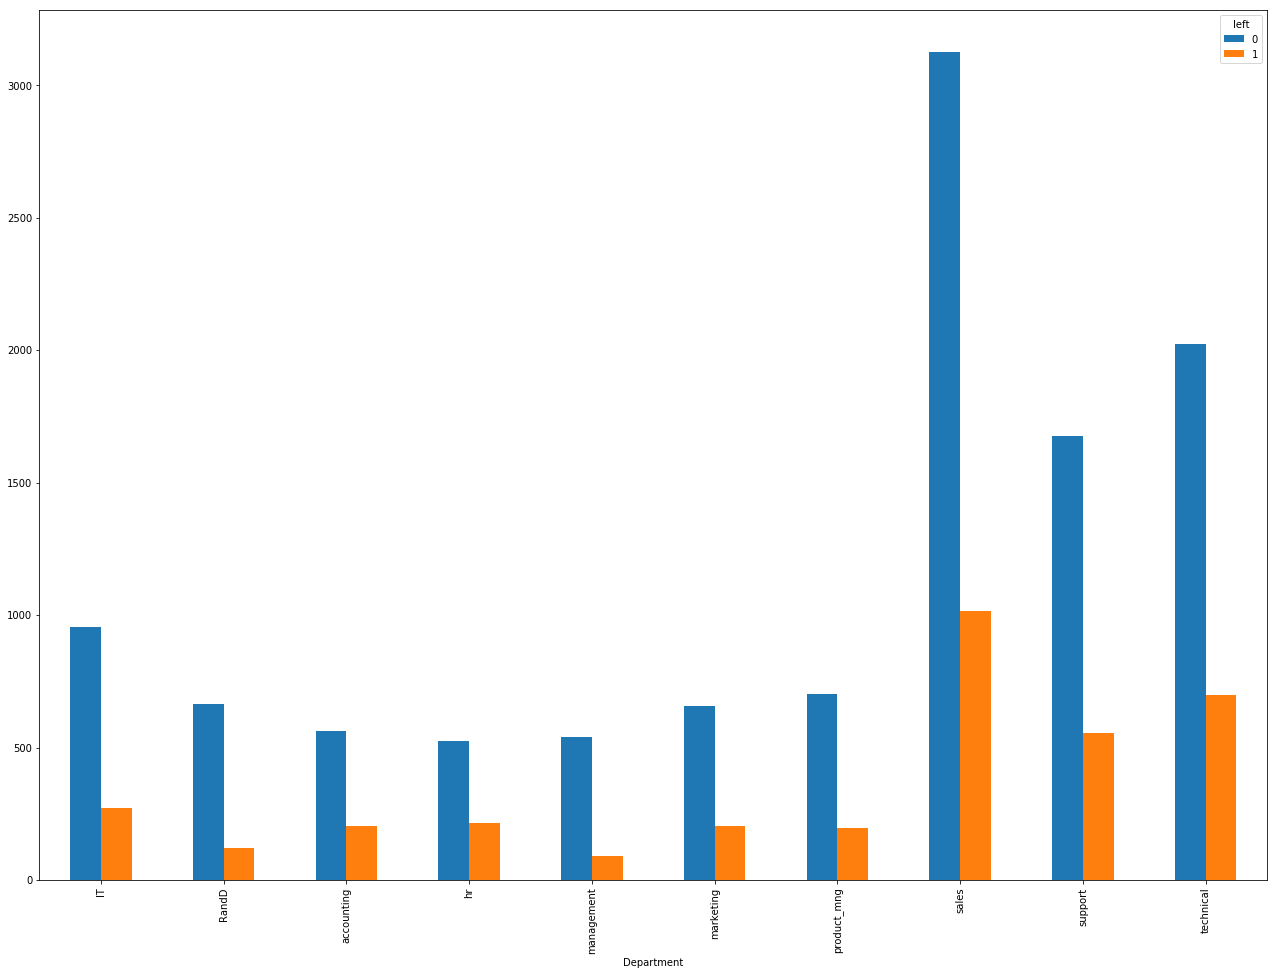

In [21]:
pd.crosstab(data.Department,data.left).plot(kind='bar', figsize=(22,16))

In [22]:
data.Department.value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

***So far from the Data analysis we can easily conclude that the followings will be the dependent variables:***
1. Satisfaction_Level
2. Average Monthly Hours
3. Promotion Last 5 years
4. Salary 

In [23]:
new_data=data[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
new_data.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


In [24]:
#Now here i will apply the LOGISTICS REGRESSION analysis where the employees will leave or hold the job

In [25]:
dummy=pd.get_dummies(data.salary)
dummy.head()

,high,low,medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [26]:
new_data_dummy=pd.concat([new_data,dummy],axis='columns')
new_data_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,high,low,medium
0,0.38,157,0,low,0,1,0
1,0.80,262,0,medium,0,0,1
2,0.11,272,0,medium,0,0,1
3,0.72,223,0,low,0,1,0
4,0.37,159,0,low,0,1,0


In [27]:
new_data_dummy.drop('salary',axis='columns',inplace=True)
new_data_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [28]:
new_data_dummy.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,high,low,medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0


In [29]:
from sklearn.model_selection import train_test_split
x=new_data_dummy
y=data.left

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3)

In [31]:
from sklearn.linear_model import LogisticRegression 
model=LogisticRegression()
model.fit(x_train,y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0])

In [33]:
model.score(x_test,y_test)

0.7762222222222223